<a href="https://colab.research.google.com/github/thanhkhiem1411/Initialize-this-repository-with-Add-a-README-file/blob/main/PLDA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
!pip install u kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.3 MB/s eta 0:00:00


In [1]:
!pip install impyute

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [3]:
df = pd.read_csv('kidney_disease.csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
df.shape

(400, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
#Change name columns
cols_names={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

df.rename(columns=cols_names, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

# Change type of some features

In [8]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')

In [9]:
numerical_features = []
categorical_features = []

for i in df.columns:
    if df[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [10]:
#prints lists of unique values ​​of categorical features
for feats in categorical_features:
    print(f'{feats} has {df[feats].unique()} categories.\n')

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] categories.

albumin has [ 1.  4.  2.  3.  0. nan  5.] categories.

sugar has [ 0.  3.  4.  1. nan  2.  5.] categories.

red_blood_cells has [nan 'normal' 'abnormal'] categories.

pus_cell has ['normal' 'abnormal' nan] categories.

pus_cell_clumps has ['notpresent' 'present' nan] categories.

bacteria has ['notpresent' 'present' nan] categories.

hypertension has ['yes' 'no' nan] categories.

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] categories.

coronary_artery_disease has ['no' 'yes' '\tno' nan] categories.

appetite has ['good' 'poor' nan] categories.

pedal_edema has ['no' 'yes' nan] categories.

anemia has ['no' 'yes' nan] categories.

classification has ['ckd' 'ckd\t' 'notckd'] categories.



In [11]:
#Replace incorrect values
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

In [12]:
for feats in categorical_features:
    print(f'{feats} has {df[feats].unique()} categories.\n')

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] categories.

albumin has [ 1.  4.  2.  3.  0. nan  5.] categories.

sugar has [ 0.  3.  4.  1. nan  2.  5.] categories.

red_blood_cells has [nan 'normal' 'abnormal'] categories.

pus_cell has ['normal' 'abnormal' nan] categories.

pus_cell_clumps has ['notpresent' 'present' nan] categories.

bacteria has ['notpresent' 'present' nan] categories.

hypertension has ['yes' 'no' nan] categories.

diabetes_mellitus has ['yes' 'no' nan] categories.

coronary_artery_disease has ['no' 'yes' nan] categories.

appetite has ['good' 'poor' nan] categories.

pedal_edema has ['no' 'yes' nan] categories.

anemia has ['no' 'yes' nan] categories.

classification has ['ckd' 'notckd'] categories.



In [13]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [14]:
df.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [15]:
#Check duplicated
df.duplicated().sum()

0

# Missing Values

<Axes: >

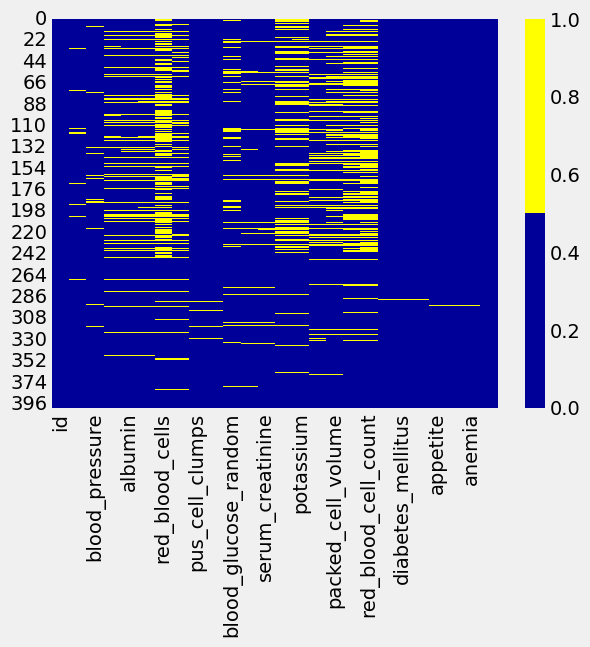

In [16]:
import seaborn as sns
cols =df.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

We have a lot of missing values, so I'm going to process those missing values in each column.

In [17]:
df.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

In [18]:
# Calculate the percentage of missing data in each column.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
age - 2%
blood_pressure - 3%
specific_gravity - 12%
albumin - 12%
sugar - 12%
red_blood_cells - 38%
pus_cell - 16%
pus_cell_clumps - 1%
bacteria - 1%
blood_glucose_random - 11%
blood_urea - 5%
serum_creatinine - 4%
sodium - 22%
potassium - 22%
haemoglobin - 13%
packed_cell_volume - 18%
white_blood_cell_count - 26%
red_blood_cell_count - 33%
hypertension - 0%
diabetes_mellitus - 0%
coronary_artery_disease - 0%
appetite - 0%
pedal_edema - 0%
anemia - 0%
classification - 0%


# Test and fill some columns

In [19]:
df_2=df.copy()

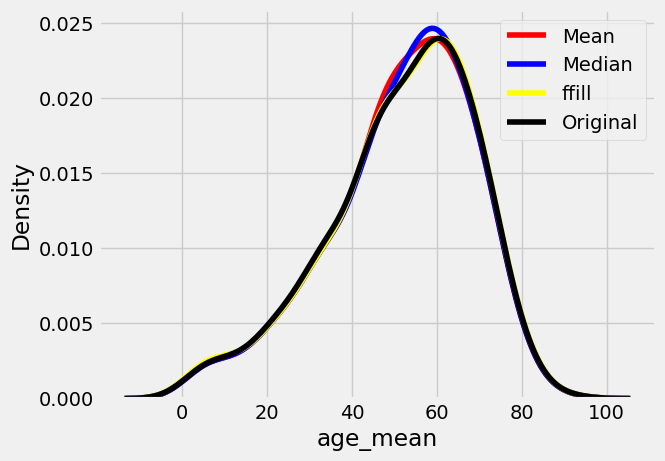

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
age_mean = df_2.age.mean()
age_median = df_2.age.median()
df_2['age_mean'] = df_2.age.fillna(age_mean)
df_2['age_median'] = df_2.age.fillna(age_median)
df_2['new_age'] = df_2['age'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(df_2['age_mean'],color='red',label='Mean')
sns.kdeplot(df_2['age_median'],color='blue',label='Median')
sns.kdeplot(df_2['new_age'] ,color='yellow',label='ffill')
sns.kdeplot(df_2['age'],color='black',label='Original')
plt.legend()

In [21]:
df['age']=df_2['new_age']

# Continue With The Above 3 Methods For Another Column

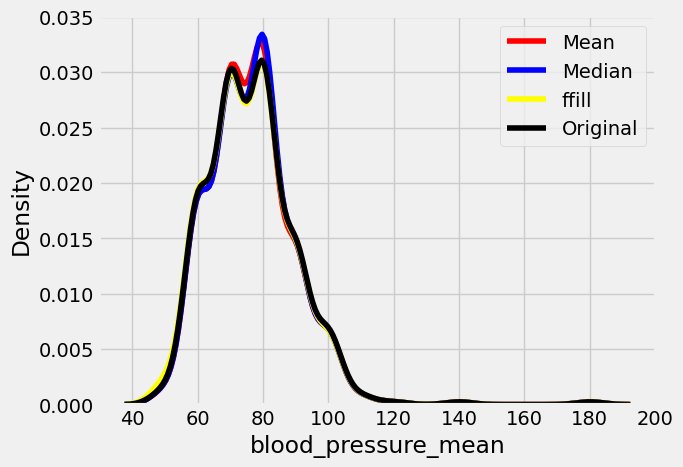

In [22]:
blood_pressure_mean = df_2.blood_pressure.mean()
blood_pressure_median = df_2.blood_pressure.median()
df_2['blood_pressure_mean'] = df_2.blood_pressure.fillna(blood_pressure_mean)
df_2['blood_pressure_median'] = df_2.blood_pressure.fillna(blood_pressure_median)
df_2['new_blood_pressure'] = df_2['blood_pressure'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(df_2['blood_pressure_mean'],color='red',label='Mean')
sns.kdeplot(df_2['blood_pressure_median'],color='blue',label='Median')
sns.kdeplot(df_2['new_blood_pressure'] ,color='yellow',label='ffill')
sns.kdeplot(df_2['blood_pressure'],color='black',label='Original')
plt.legend()

In [23]:
df['blood_pressure']=df_2['new_blood_pressure']

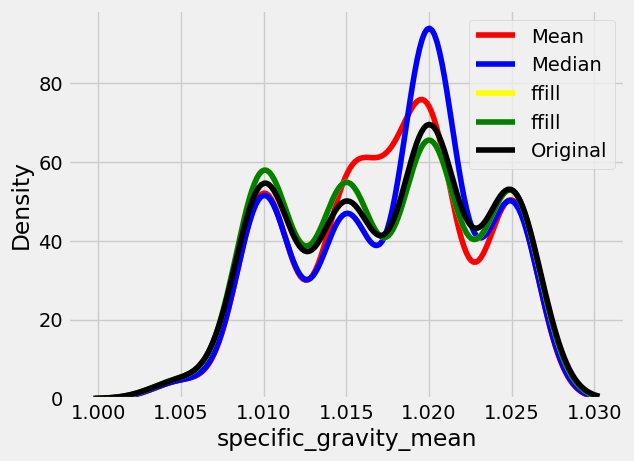

In [24]:
specific_gravity_mean = df_2.specific_gravity.mean()
specific_gravity_median = df_2.specific_gravity.median()
df_2['specific_gravity_mean'] = df_2.specific_gravity.fillna(specific_gravity_mean)
df_2['specific_gravity_median'] = df_2.specific_gravity.fillna(specific_gravity_median)
df_2['new_specific_gravity'] = df_2['specific_gravity'].fillna(method="ffill")
df_2['specific_gravity_new'] = df_2['specific_gravity'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(df_2['specific_gravity_mean'],color='red',label='Mean')
sns.kdeplot(df_2['specific_gravity_median'],color='blue',label='Median')
sns.kdeplot(df_2['new_specific_gravity'] ,color='yellow',label='ffill')
sns.kdeplot(df_2['specific_gravity_new'] ,color='green',label='ffill')
sns.kdeplot(df_2['specific_gravity'],color='black',label='Original')
plt.legend()

In [25]:
df['specific_gravity']=df_2['new_specific_gravity']

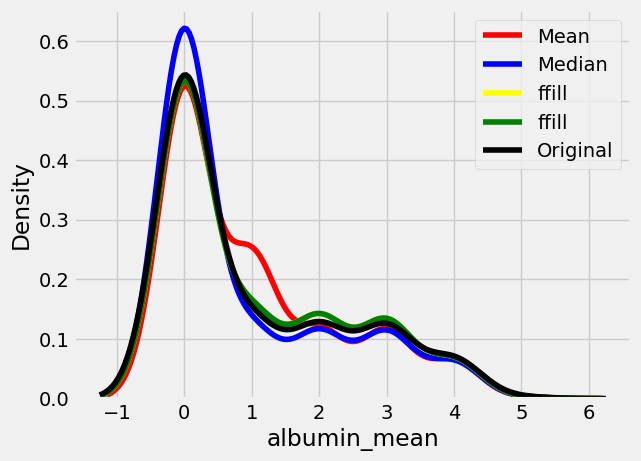

In [26]:
albumin_mean = df_2.albumin.mean()
albumin_median = df_2.albumin.median()
df_2['albumin_mean'] = df_2.albumin.fillna(albumin_mean)
df_2['albumin_median'] = df_2.albumin.fillna(albumin_median)
df_2['new_albumin'] = df_2['albumin'].fillna(method="ffill")
df_2['albumin_new'] = df_2['albumin'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(df_2['albumin_mean'],color='red',label='Mean')
sns.kdeplot(df_2['albumin_median'],color='blue',label='Median')
sns.kdeplot(df_2['new_albumin'] ,color='yellow',label='ffill')
sns.kdeplot(df_2['albumin_new'] ,color='green',label='ffill')
sns.kdeplot(df_2['albumin'],color='black',label='Original')
plt.legend()

In [27]:
df['albumin']=df_2['new_albumin']

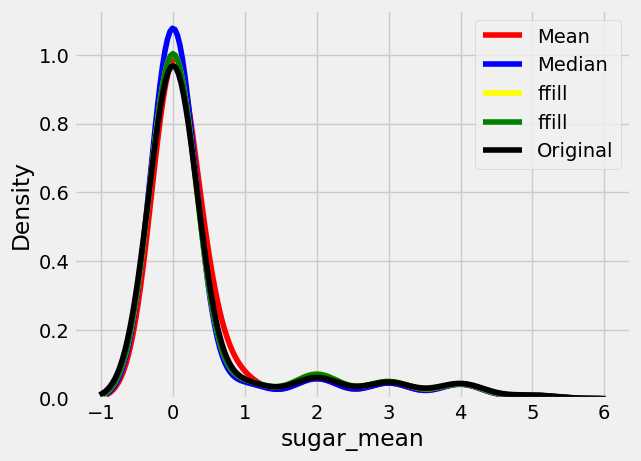

In [28]:
sugar_mean = df_2.sugar.mean()
sugar_median = df_2.sugar.median()
df_2['sugar_mean'] = df_2.sugar.fillna(sugar_mean)
df_2['sugar_median'] = df_2.sugar.fillna(sugar_median)
df_2['new_sugar'] = df_2['sugar'].fillna(method="ffill")
df_2['sugar_new'] = df_2['sugar'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(df_2['sugar_mean'],color='red',label='Mean')
sns.kdeplot(df_2['sugar_median'],color='blue',label='Median')
sns.kdeplot(df_2['new_sugar'] ,color='yellow',label='ffill')
sns.kdeplot(df_2['sugar_new'] ,color='green',label='ffill')
sns.kdeplot(df_2['sugar'],color='black',label='Original')
plt.legend()

From the figure, we notice that there is a convergence in the distribution between the first, third and fourth techniques, but at the end of the figure we notice that the most appropriate are the third and fourth, so we will use any of them.

In [29]:
df['sugar']=df_2['new_sugar']

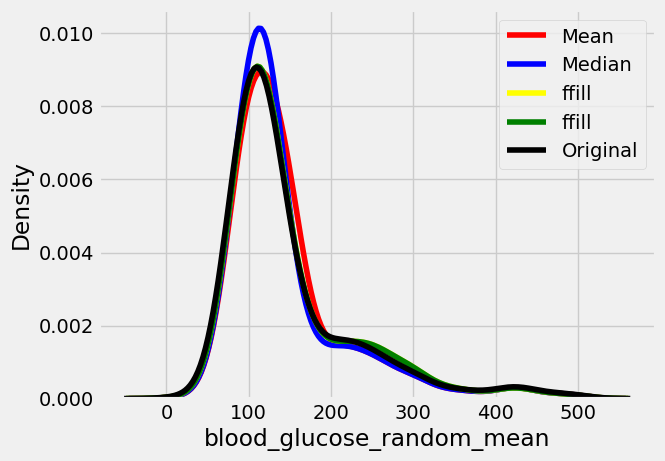

In [30]:
import matplotlib.pyplot as plt
blood_glucose_random_mean = df_2.blood_glucose_random.mean()
blood_glucose_random_median = df_2.blood_glucose_random.median()
df_2['blood_glucose_random_mean'] = df_2.blood_glucose_random.fillna(blood_glucose_random_mean)
df_2['blood_glucose_random_median'] = df_2.blood_glucose_random.fillna(blood_glucose_random_median)
df_2['new_blood_glucose_random'] = df_2['blood_glucose_random'].fillna(method="ffill")
df_2['blood_glucose_random_new'] = df_2['blood_glucose_random'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(df_2['blood_glucose_random_mean'],color='red',label='Mean')
sns.kdeplot(df_2['blood_glucose_random_median'],color='blue',label='Median')
sns.kdeplot(df_2['new_blood_glucose_random'] ,color='yellow',label='ffill')
sns.kdeplot(df_2['blood_glucose_random_new'] ,color='green',label='ffill')
sns.kdeplot(df_2['blood_glucose_random'],color='black',label='Original')
plt.legend()

In [31]:
df['blood_glucose_random']=df_2['blood_glucose_random_new']

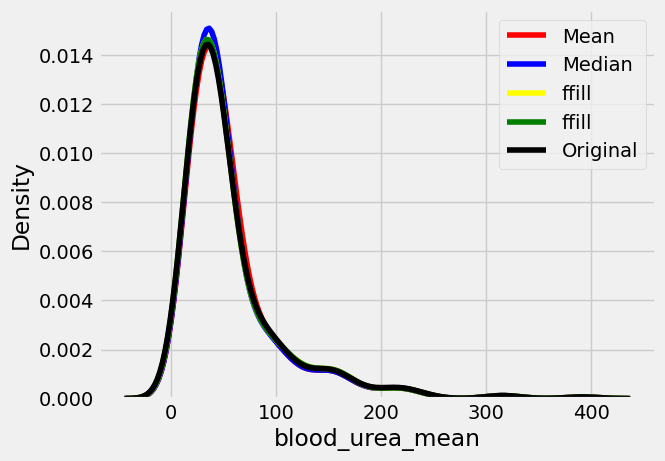

In [32]:
blood_urea_mean = df_2.blood_urea.mean()
blood_urea_median = df_2.blood_urea.median()
df_2['blood_urea_mean'] = df_2.blood_urea.fillna(blood_urea_mean)
df_2['blood_urea_median'] = df_2.blood_urea.fillna(blood_urea_median)
df_2['new_blood_urea'] = df_2['blood_urea'].fillna(method="ffill")
df_2['blood_urea_new'] = df_2['blood_urea'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(df_2['blood_urea_mean'],color='red',label='Mean')
sns.kdeplot(df_2['blood_urea_median'],color='blue',label='Median')
sns.kdeplot(df_2['new_blood_urea'] ,color='yellow',label='ffill')
sns.kdeplot(df_2['blood_urea_new'] ,color='green',label='ffill')
sns.kdeplot(df_2['blood_urea'],color='black',label='Original')
plt.legend()

In [33]:
df['blood_urea']=df_2['blood_urea_mean']

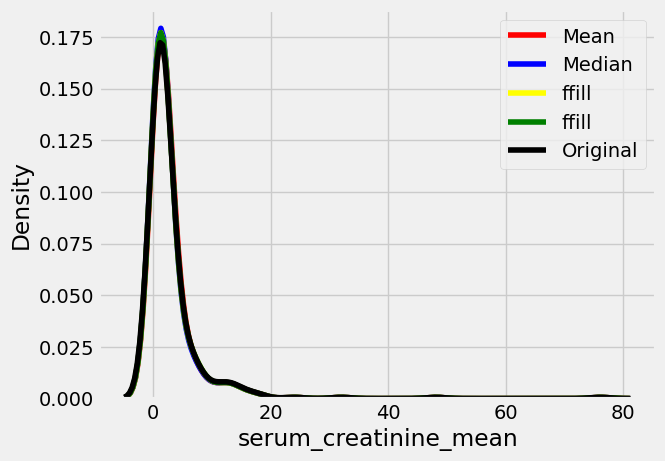

In [34]:
serum_creatinine_mean = df_2.serum_creatinine.mean()
serum_creatinine_median = df_2.serum_creatinine.median()
df_2['serum_creatinine_mean'] = df_2.serum_creatinine.fillna(serum_creatinine_mean)
df_2['serum_creatinine_median'] = df_2.serum_creatinine.fillna(serum_creatinine_median)
df_2['new_serum_creatinine'] = df_2['serum_creatinine'].fillna(method="ffill")
df_2['serum_creatinine_new'] = df_2['serum_creatinine'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(df_2['serum_creatinine_mean'],color='red',label='Mean')
sns.kdeplot(df_2['serum_creatinine_median'],color='blue',label='Median')
sns.kdeplot(df_2['new_serum_creatinine'] ,color='yellow',label='ffill')
sns.kdeplot(df_2['serum_creatinine_new'] ,color='green',label='ffill')
sns.kdeplot(df_2['serum_creatinine'],color='black',label='Original')
plt.legend()

In [35]:
df['serum_creatinine']=df_2['serum_creatinine_mean']

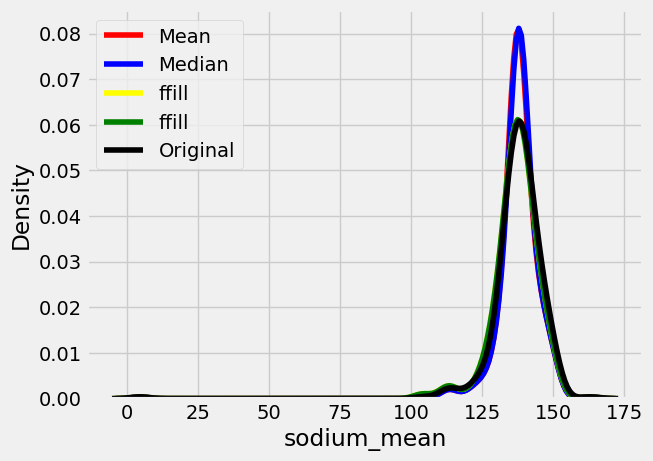

In [36]:
sodium_mean = df_2.sodium.mean()
sodium_median = df_2.sodium.median()
df_2['sodium_mean'] = df_2.sodium.fillna(sodium_mean)
df_2['sodium_median'] = df_2.sodium.fillna(sodium_median)
df_2['new_sodium'] = df_2['sodium'].fillna(method="ffill")
df_2['sodidum_new'] = df_2['sodium'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(df_2['sodium_mean'],color='red',label='Mean')
sns.kdeplot(df_2['sodium_median'],color='blue',label='Median')
sns.kdeplot(df_2['new_sodium'] ,color='yellow',label='ffill')
sns.kdeplot(df_2['sodidum_new'] ,color='green',label='ffill')
sns.kdeplot(df_2['sodium'],color='black',label='Original')
plt.legend()

In [37]:
df['sodium']=df_2['sodidum_new']

In [38]:
df['sodium'].head(10)

0      NaN
1      NaN
2      NaN
3    111.0
4    111.0
5    142.0
6    104.0
7    104.0
8    104.0
9    114.0
Name: sodium, dtype: float64

In [39]:
df_2['sodium']=df['sodium']
sodium_mean = df_2.sodium.mean()
df_2['sodium_mean'] = df_2.sodium.fillna(sodium_mean)

In [40]:
df['sodium']=df_2['sodium_mean']
print(df['sodium'].isnull().sum())

0


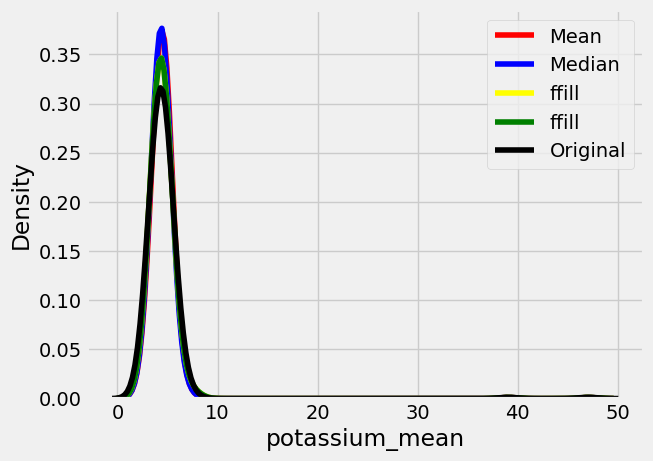

In [41]:
potassium_mean = df_2.potassium.mean()
potassium_median = df_2.potassium.median()
df_2['potassium_mean'] = df_2.potassium.fillna(potassium_mean)
df_2['potassium_median'] = df_2.potassium.fillna(potassium_median)
df_2['new_potassium'] = df_2['potassium'].fillna(method="ffill")
df_2['potassium_new'] = df_2['potassium'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(df_2['potassium_mean'],color='red',label='Mean')
sns.kdeplot(df_2['potassium_median'],color='blue',label='Median')
sns.kdeplot(df_2['new_potassium'] ,color='yellow',label='ffill')
sns.kdeplot(df_2['potassium_new'] ,color='green',label='ffill')
sns.kdeplot(df_2['potassium'],color='black',label='Original')
plt.legend()

We note that the most appropriate distribution is the distribution for the second and third techniques, so I will use any of them.

In [42]:
df['potassium']=df_2['potassium_new']

In [43]:
df['potassium'].head()

0    NaN
1    NaN
2    NaN
3    2.5
4    2.5
Name: potassium, dtype: float64

In [44]:
df_2['potassium']=df['potassium']
potassium_mean = df_2.potassium.mean()
df_2['potassium_mean'] = df_2.potassium.fillna(potassium_mean)

In [45]:
df['potassium']=df_2['potassium_mean']
print(df['potassium'].isnull().sum())

0


In [46]:
df['potassium'].head()

0    4.604786
1    4.604786
2    4.604786
3    2.500000
4    2.500000
Name: potassium, dtype: float64

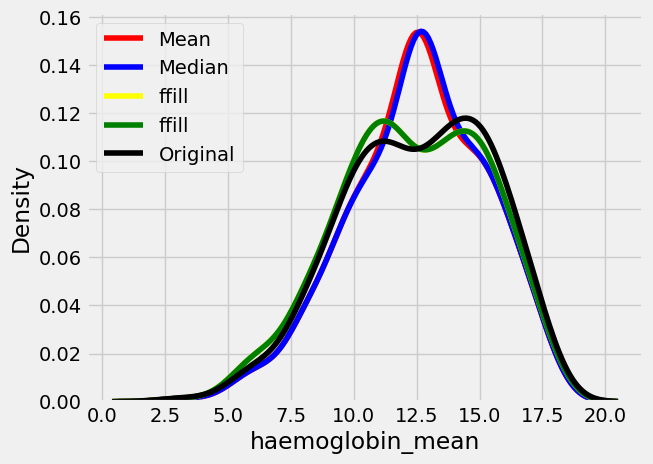

In [47]:
haemoglobin_mean = df_2.haemoglobin.mean()
haemoglobin_median = df_2.haemoglobin.median()
df_2['haemoglobin_mean'] = df_2.haemoglobin.fillna(haemoglobin_mean)
df_2['haemoglobin_median'] = df_2.haemoglobin.fillna(haemoglobin_median)
df_2['new_haemoglobin'] = df_2['haemoglobin'].fillna(method="ffill")
df_2['haemoglobin_new'] = df_2['haemoglobin'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(df_2['haemoglobin_mean'],color='red',label='Mean')
sns.kdeplot(df_2['haemoglobin_median'],color='blue',label='Median')
sns.kdeplot(df_2['new_haemoglobin'] ,color='yellow',label='ffill')
sns.kdeplot(df_2['haemoglobin_new'] ,color='green',label='ffill')
sns.kdeplot(df_2['haemoglobin'],color='black',label='Original')
plt.legend()

In [48]:
df['haemoglobin']=df_2['haemoglobin_new']

Check Null, Delete Null and Fill Null

In [50]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_cols = categorical_data.columns.values
print(categorical_cols)

['red_blood_cells' 'pus_cell' 'pus_cell_clumps' 'bacteria' 'hypertension'
 'diabetes_mellitus' 'coronary_artery_disease' 'appetite' 'pedal_edema'
 'anemia' 'classification']


In [49]:
df['red_blood_cells'].isnull().sum()

152

In [51]:
df['red_blood_cells'].value_counts()

red_blood_cells
normal      201
abnormal     47
Name: count, dtype: int64

<Axes: xlabel='red_blood_cells'>

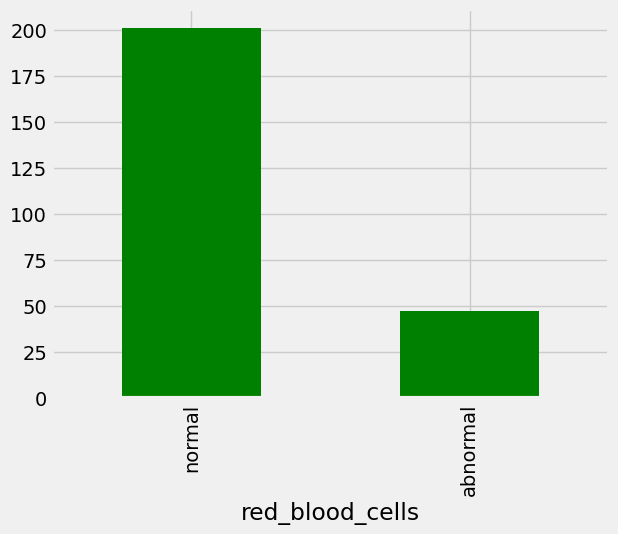

In [52]:
df['red_blood_cells'].value_counts().plot.bar(color='green')

In [53]:
df['red_blood_cells'].fillna(method='ffill', inplace=True)

In [54]:
df['red_blood_cells'].isnull().sum()

2

In [55]:
df['red_blood_cells'].fillna('normal', inplace=True)

In [56]:
df['red_blood_cells'].value_counts()

red_blood_cells
normal      291
abnormal    109
Name: count, dtype: int64

In [57]:
df['pus_cell'].isnull().sum()

65

In [58]:
df['pus_cell'].value_counts()

pus_cell
normal      259
abnormal     76
Name: count, dtype: int64

In [59]:
new_var = df['pus_cell'].fillna(method='ffill', inplace=True)

<Axes: xlabel='pus_cell'>

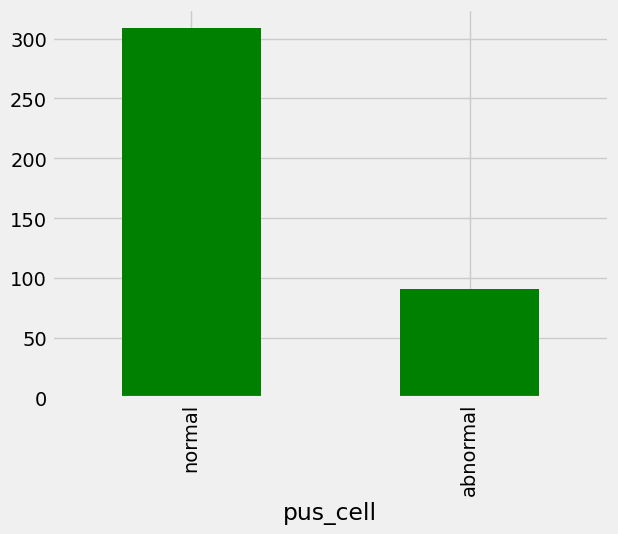

In [60]:
df['pus_cell'].value_counts().plot.bar(color='green')

In [61]:
df['pus_cell'].value_counts()

pus_cell
normal      309
abnormal     91
Name: count, dtype: int64

In [62]:
df['pus_cell_clumps'].isnull().sum()

4

In [63]:
df['pus_cell_clumps'].value_counts()

pus_cell_clumps
notpresent    354
present        42
Name: count, dtype: int64

In [64]:
df['pus_cell_clumps'].fillna(method='ffill', inplace=True)

<Axes: xlabel='pus_cell_clumps'>

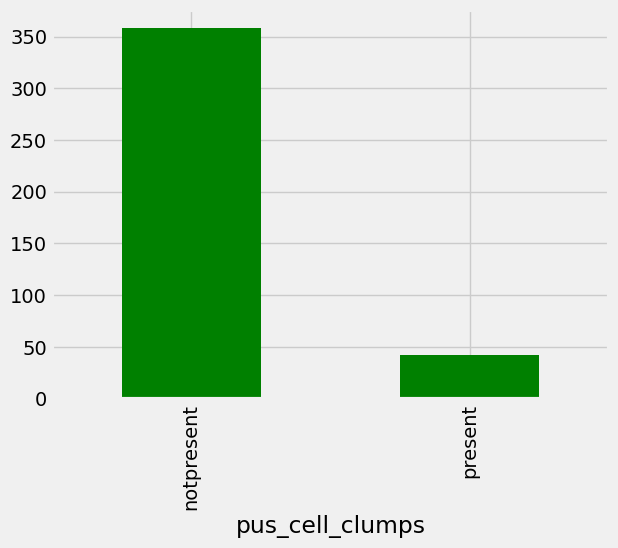

In [65]:
df['pus_cell_clumps'].value_counts().plot.bar(color='green')

In [66]:
df['bacteria'].value_counts()

bacteria
notpresent    374
present        22
Name: count, dtype: int64

In [67]:
df['bacteria'].fillna(method='ffill', inplace=True)

<Axes: xlabel='bacteria'>

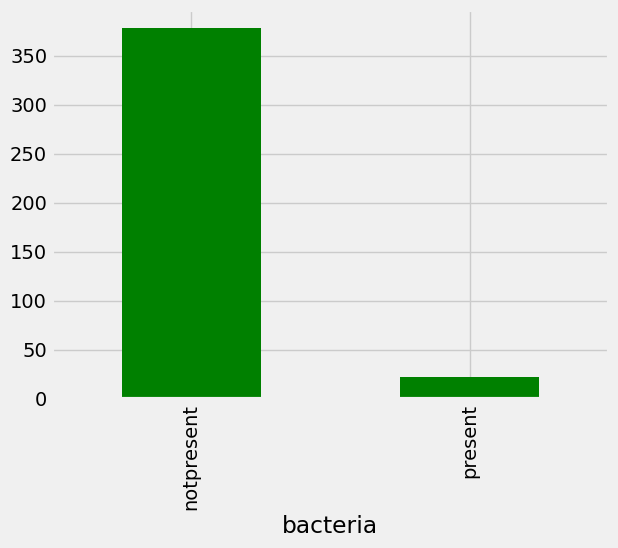

In [68]:
df['bacteria'].value_counts().plot.bar(color='green')

In [69]:
df['hypertension'].isnull().sum()

2

In [70]:
df['hypertension'].value_counts()

hypertension
no     251
yes    147
Name: count, dtype: int64

In [71]:
df['hypertension'].fillna(method='ffill', inplace=True)

In [72]:
df['diabetes_mellitus'].isnull().sum()

2

In [73]:
df['diabetes_mellitus'].value_counts()

diabetes_mellitus
no     261
yes    137
Name: count, dtype: int64

In [74]:
df['diabetes_mellitus'].fillna(method='ffill', inplace=True)

In [75]:
df['coronary_artery_disease'].isnull().sum()

2

In [76]:
df['coronary_artery_disease'].value_counts()

coronary_artery_disease
no     364
yes     34
Name: count, dtype: int64

In [77]:
df['coronary_artery_disease'].fillna(method='ffill', inplace=True)

In [78]:
df['appetite'].value_counts()

appetite
good    317
poor     82
Name: count, dtype: int64

In [79]:
df['appetite'].fillna(method='ffill', inplace=True)

In [80]:
df['pedal_edema'].value_counts()

pedal_edema
no     323
yes     76
Name: count, dtype: int64

In [81]:
df['pedal_edema'].fillna(method='ffill', inplace=True)

In [82]:
df['anemia'].value_counts()

anemia
no     339
yes     60
Name: count, dtype: int64

In [83]:
df['anemia'].fillna(method='ffill', inplace=True)

In [84]:
df['packed_cell_volume'].isnull().sum()

71

In [85]:
df['packed_cell_volume'].value_counts()

packed_cell_volume
41.0    21
52.0    21
44.0    19
48.0    19
40.0    16
43.0    15
42.0    13
45.0    13
32.0    12
50.0    12
36.0    12
33.0    12
28.0    12
34.0    11
37.0    11
30.0     9
29.0     9
35.0     9
46.0     9
31.0     8
24.0     7
39.0     7
26.0     6
38.0     5
53.0     4
51.0     4
49.0     4
47.0     4
54.0     4
25.0     3
27.0     3
22.0     3
19.0     2
23.0     2
15.0     1
21.0     1
20.0     1
17.0     1
9.0      1
18.0     1
14.0     1
16.0     1
Name: count, dtype: int64

It seems that this column has an error in the data, I will fix it. Update We fixed it by adding the above code.

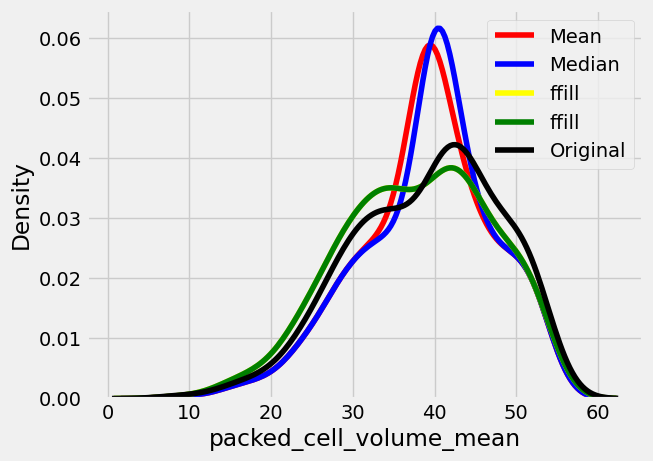

In [86]:
packed_cell_volume_mean = df_2.packed_cell_volume.mean()
packed_cell_volume_median = df_2.packed_cell_volume.median()
df_2['packed_cell_volume_mean'] = df_2.packed_cell_volume.fillna(packed_cell_volume_mean)
df_2['packed_cell_volume_median'] = df_2.packed_cell_volume.fillna(packed_cell_volume_median)
df_2['new_packed_cell_volume'] = df_2['packed_cell_volume'].fillna(method="ffill")
df_2['packed_cell_volume_new'] = df_2['packed_cell_volume'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(df_2['packed_cell_volume_mean'],color='red',label='Mean')
sns.kdeplot(df_2['packed_cell_volume_median'],color='blue',label='Median')
sns.kdeplot(df_2['new_packed_cell_volume'] ,color='yellow',label='ffill')
sns.kdeplot(df_2['packed_cell_volume_new'] ,color='green',label='ffill')
sns.kdeplot(df_2['packed_cell_volume'],color='black',label='Original')
plt.legend()

In [87]:
df['packed_cell_volume']=df_2['packed_cell_volume_new']

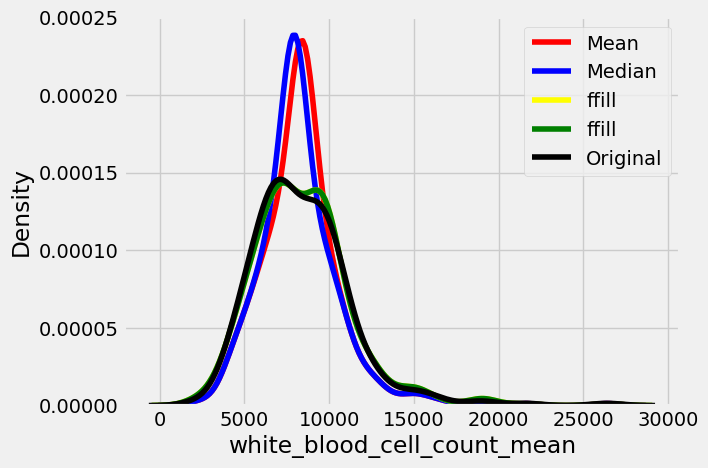

In [88]:
white_blood_cell_count_mean = df_2.white_blood_cell_count.mean()
white_blood_cell_count_median = df_2.white_blood_cell_count.median()
df_2['white_blood_cell_count_mean'] = df_2.white_blood_cell_count.fillna(white_blood_cell_count_mean)
df_2['white_blood_cell_count_median'] = df_2.white_blood_cell_count.fillna(white_blood_cell_count_median)
df_2['new_white_blood_cell_count'] = df_2['white_blood_cell_count'].fillna(method="ffill")
df_2['white_blood_cell_count_new'] = df_2['white_blood_cell_count'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(df_2['white_blood_cell_count_mean'],color='red',label='Mean')
sns.kdeplot(df_2['white_blood_cell_count_median'],color='blue',label='Median')
sns.kdeplot(df_2['new_white_blood_cell_count'] ,color='yellow',label='ffill')
sns.kdeplot(df_2['white_blood_cell_count_new'] ,color='green',label='ffill')
sns.kdeplot(df_2['white_blood_cell_count'],color='black',label='Original')
plt.legend()

In [89]:
df['white_blood_cell_count']=df_2['white_blood_cell_count']

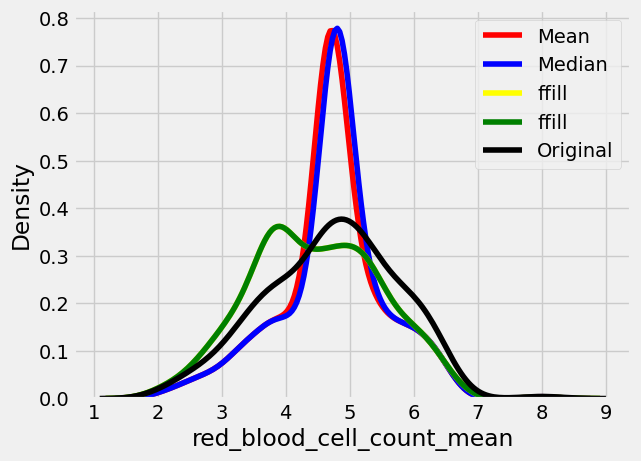

In [90]:
red_blood_cell_count_mean = df_2.red_blood_cell_count.mean()
red_blood_cell_count_median = df_2.red_blood_cell_count.median()
df_2['red_blood_cell_count_mean'] = df_2.red_blood_cell_count.fillna(red_blood_cell_count_mean)
df_2['red_blood_cell_count_median'] = df_2.red_blood_cell_count.fillna(red_blood_cell_count_median)
df_2['new_red_blood_cell_count'] = df_2['red_blood_cell_count'].fillna(method="ffill")
df_2['red_blood_cell_count_new'] = df_2['red_blood_cell_count'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(df_2['red_blood_cell_count_mean'],color='red',label='Mean')
sns.kdeplot(df_2['red_blood_cell_count_median'],color='blue',label='Median')
sns.kdeplot(df_2['new_red_blood_cell_count'] ,color='yellow',label='ffill')
sns.kdeplot(df_2['red_blood_cell_count_new'] ,color='green',label='ffill')
sns.kdeplot(df_2['red_blood_cell_count'],color='black',label='Original')
plt.legend()

In [91]:
df['red_blood_cell_count']=df_2['red_blood_cell_count_new']

In [92]:
#Remove id because it's not necessary
df=df.drop('id' , axis=1)

Now that we are done with the substitution phase for the empty values, let's move on to the next step.

# Targer Column Check

In [93]:
df['classification'].fillna(method='ffill', inplace=True)

In [94]:
df['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

# Data Balance Check

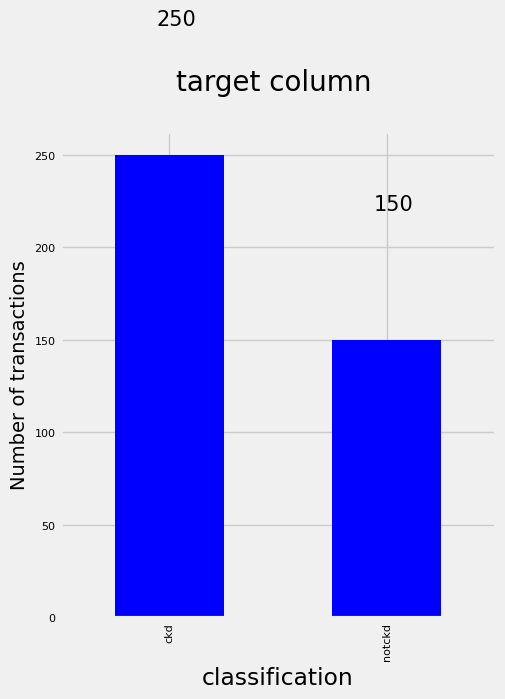

In [95]:
ax = df["classification"].value_counts().plot(kind='bar', figsize=(5, 6), fontsize=8, color='blue')
ax.set_title('target column ', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 70, str(round(i.get_height(), 2)), fontsize=15)

It appears that the data has a relatively good balance between the categories of the target column, and therefore we will not manipulate this natural balance

# Check All Data Again

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    object 
 6   pus_cell                 400 non-null    object 
 7   pus_cell_clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

# EDA - Correlation

In [97]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,136.789673,4.604786,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,18.0,0.8,136.789673,4.604786,11.3,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,136.789673,4.604786,9.6,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,111.000000,2.500000,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


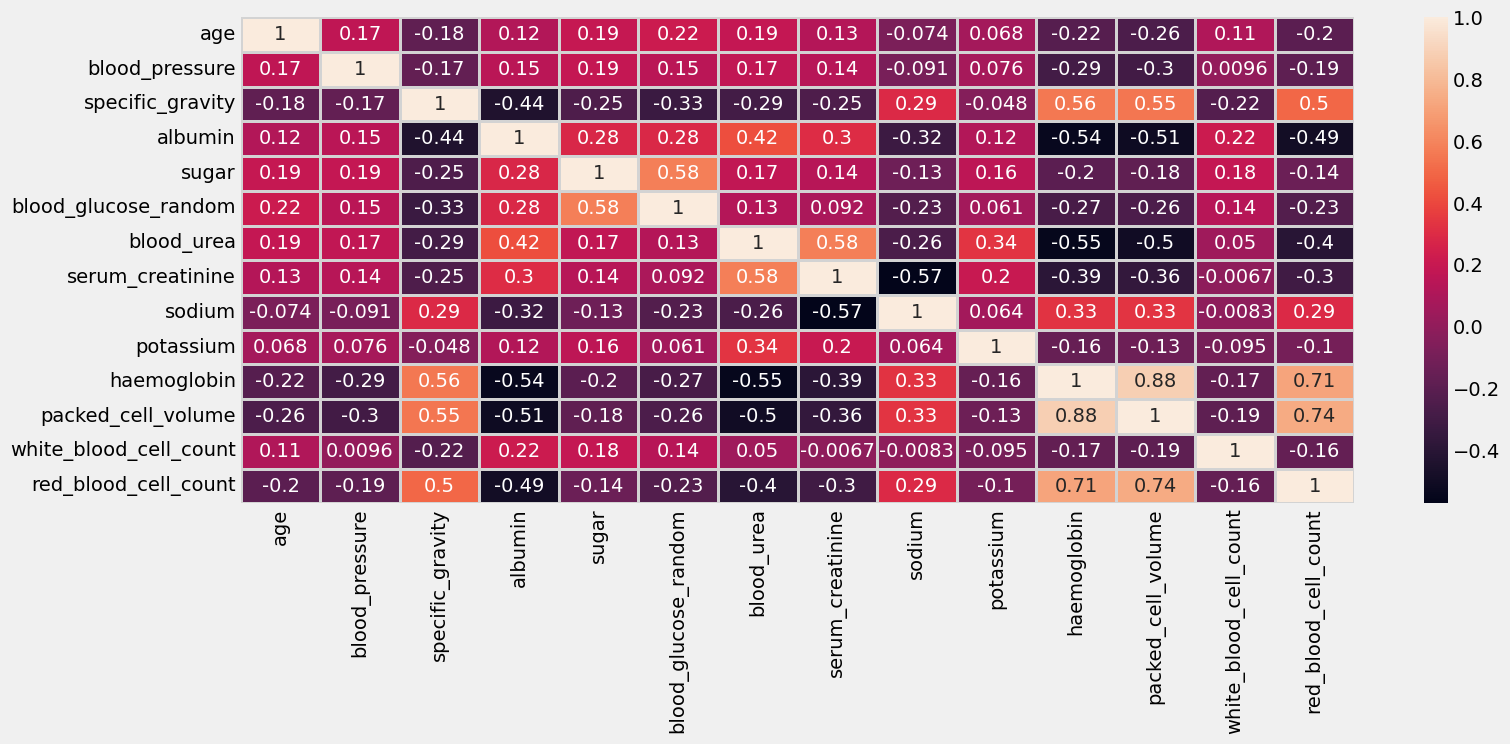

In [98]:
plt.figure(figsize=(16, 6))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, linewidths=2, linecolor='lightgrey')
plt.show()

1.   Positive Correlation
*   hemoglobin -> red_blood_cell_count (0,71),packed_cell_volume (0,88), specific_gravity(0,55)
*   red_blood_cell_count -> packed_cell_volume(0,74),specific_gravity(0,5)
*   specific_gravity -> packed_cell_volume (0,55)
*   blood_glucose_random -> sugar (0,58)
*   serum_creatinine -> blood_urea (0,58)

2.   Negative correlation
* Albumin -> hemoglobin(-0,54), packed_cell_volume(-0,51),specific_gravity(-0,44),red_blood_cell_count(-0,49)
*   Serum_creatinine -> sodium(-0,57)
*   blood_urea -> hemoglobin(-0,55), packed_cell_volume(-0,5),red_blood_cell_count(-0,4)






# Positive Correlation

RBC, PCV, Hemoglobin

In [99]:
!pip install plotly

In [100]:
import plotly.express as px

In [101]:
def violin(col):
    fig = px.violin(df, y=col, x="classification", color="classification", box=True, points="all", hover_data=df.columns)
    return fig.show()
def kde_plot(feature):
    grid = sns.FacetGrid(df, hue="classification", aspect = 2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
!pip install jovian
import jovian
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [104]:
target_variable = "classification"

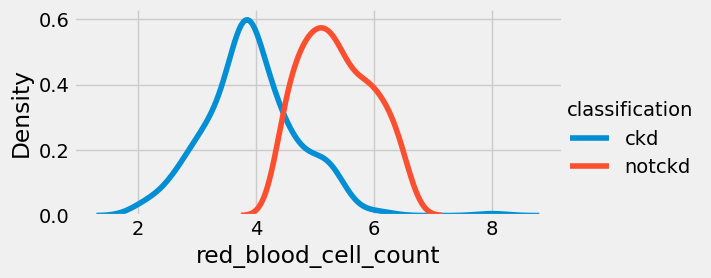

In [105]:
def kde_plot(feature):
    grid = sns.FacetGrid(df, hue=target_variable, aspect = 2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()
    return grid

kde_plot('red_blood_cell_count')

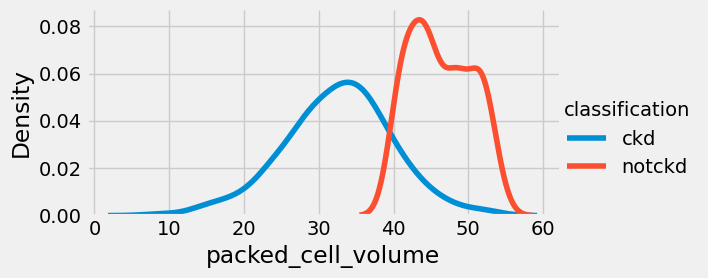

In [106]:
kde_plot('packed_cell_volume')

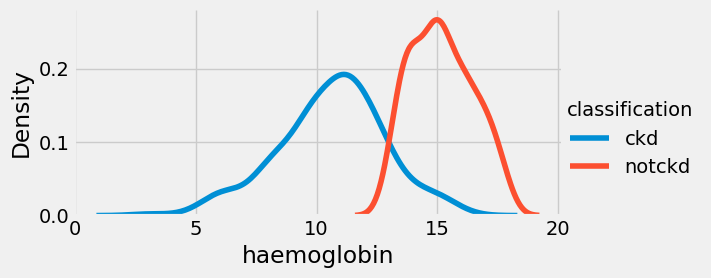

In [107]:
kde_plot('haemoglobin')

In [130]:
fig = px.scatter(df, x="red_blood_cell_count", y="haemoglobin", color="classification")
fig.show()

In [108]:
fig = px.scatter(df, x="red_blood_cell_count", y="packed_cell_volume", color="classification")
fig.show()

In [109]:
fig = px.scatter(df, x="packed_cell_volume", y="red_blood_cell_count", color="classification")
fig.show()

In [110]:
fig = px.bar(df, x="red_blood_cells", y="red_blood_cell_count",color='classification', barmode='group',height=400)
fig.show()

In [111]:
df.groupby(['red_blood_cells','classification'])['red_blood_cell_count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red_blood_cells classification                                   
abnormal        ckd               109  3.964220     3.9  2.3  5.6
normal          ckd               141  3.907801     3.8  2.1  8.0
                notckd            150  5.374000     5.3  4.4  6.5

In [112]:
violin('red_blood_cell_count')

In [113]:
violin('haemoglobin')

# Negative Correlation

Albumin, Blood urea -> Red blood cell count, packed cell volume, Haemoglobin

In [114]:
fig = px.bar(df, x="albumin", y="packed_cell_volume",color='classification', barmode='group',height=400)
fig.show()

In [115]:
df.groupby(['albumin','classification'])['albumin'].count()

albumin  classification
0.0      ckd                64
         notckd            150
1.0      ckd                55
2.0      ckd                53
3.0      ckd                51
4.0      ckd                26
5.0      ckd                 1
Name: albumin, dtype: int64

In [116]:
fig = px.bar(df, x="albumin", y="haemoglobin",color='classification', barmode='group',height=400)
fig.show()

The majority, those people are suffering from chronic kidney disease who’s having less(<14) hemoglobin and >0 levels of albumin

Specific gravity

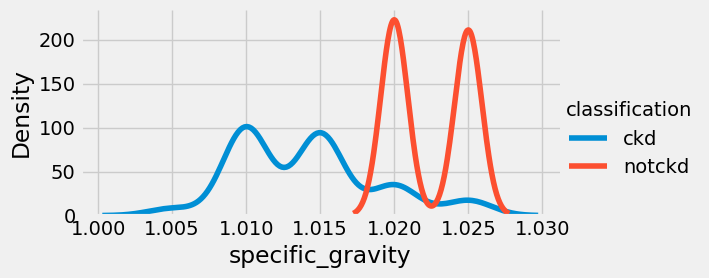

In [117]:
kde_plot('specific_gravity')

In [118]:
fig = px.bar(df, x="specific_gravity", y="packed_cell_volume",
             color='classification', barmode='group',
             height=400)
fig.show()

In [119]:
print("Number of patient who's having packed cell volume<40 and specific gravity <1.02:\n\n",df[(df['packed_cell_volume']<40)&(df['specific_gravity']<1.02)].groupby(['classification'])['classification'].agg(['count']))
print("Packed cell volume >=40 and specific gravity >=1.02:\n\n",df[(df['packed_cell_volume']>=40)&(df['specific_gravity']>=1.02)].groupby(['classification'])['classification'].agg(['count']))

Number of patient who's having packed cell volume<40 and specific gravity <1.02:

                 count
classification       
ckd               170
Packed cell volume >=40 and specific gravity >=1.02:

                 count
classification       
ckd                11
notckd            150


higher the specific_gravity lesser the chances of having CKD from the above stats we clearly say that person having packed_cell_volume <40 and specific gravity <1.02 are all CKD patients.

In [120]:
fig = px.bar(df, x="specific_gravity", y="haemoglobin",
             color='classification', barmode='group',
             height=400)
fig.show()

In [121]:
print("number of patient who's having hemoglobin <12 and specific gravity <1.02:\n\n",df[(df['haemoglobin']<12)&(df['specific_gravity']<1.02)].groupby(['classification'])['classification'].agg(['count']))
print("hemoglobin >=12 and specific gravity >=1.02:\n\n",df[(df['packed_cell_volume']>=12)&(df['specific_gravity']>=1.02)].groupby(['classification'])['classification'].agg(['count']))

number of patient who's having hemoglobin <12 and specific gravity <1.02:

                 count
classification       
ckd               151
hemoglobin >=12 and specific gravity >=1.02:

                 count
classification       
ckd                51
notckd            150


In [122]:
fig = px.bar(df, x="specific_gravity", y="red_blood_cell_count",
             color='classification', barmode='group',
             height=400)
fig.show()

In [123]:
print("number of patient who's having RBC <3.9 and specific gravity <1.02:\n\n",df[(df['red_blood_cell_count']<3.9)&(df['specific_gravity']<1.02)].groupby(['classification'])['classification'].agg(['count']))
print("RBC >=3.9 and specific gravity >=1.02:\n\n",df[(df['red_blood_cell_count']>=3.9)&(df['specific_gravity']>=1.02)].groupby(['classification'])['classification'].agg(['count']))

number of patient who's having RBC <3.9 and specific gravity <1.02:

                 count
classification       
ckd                96
RBC >=3.9 and specific gravity >=1.02:

                 count
classification       
ckd                27
notckd            150


In [124]:
df[(df['packed_cell_volume']<40)&(df['specific_gravity']<1.02)&(df['haemoglobin']<12)&(df['red_blood_cell_count']<3.9)].groupby(['classification'])['classification'].agg(['count'])

,count
classification,
ckd,91


In [125]:
violin('specific_gravity')

# White blood cell count

In [126]:
violin('white_blood_cell_count')

# potassium, blood urea, pus cell, pus cell clumps

In [127]:
fig = px.scatter(df, x="potassium", y="blood_urea", color="classification")
fig.show()

In [128]:
fig = px.scatter(df, x="potassium", y="serum_creatinine", color="classification")
fig.show()

In [129]:
fig = px.bar(df, x="pus_cell", y="blood_urea",color='classification', barmode='group',height=400)
fig.show()

In [130]:
fig = px.bar(df, x="pus_cell_clumps", y="blood_urea",color='classification', barmode='group',height=400)
fig.show()

# Sodium, Serum Creatinine, Blood Pressure, Hypertension

In [131]:
fig = px.scatter(df, x="sodium", y="blood_pressure", color="classification")
fig.show()


People who had blood pressure <60 to >80 are prone to have a chronic disease.

In [132]:
fig = px.scatter(df, x="sodium", y="serum_creatinine", color="classification")
fig.show()

In [133]:
fig = px.bar(df, x="hypertension", y="blood_pressure",color='classification', barmode='group',height=400)
fig.show()

# blood glucose random, sugar, diabetes_mellitus

In [134]:
fig = px.bar(df, x="sugar", y="blood_glucose_random",
             color='classification', barmode='group',
             height=400)
fig.show()

In [135]:
fig = px.bar(df, x="diabetes_mellitus", y="blood_glucose_random",
             color='classification', barmode='group',
             height=400)
fig.show()

# AGE

In [136]:
violin('age')